*comments are mentioned always for the line below*

**median_house_value** is target column

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

LOADING DATASET :-

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving housing.csv to housing.csv


In [ ]:
# reading the csv file
data = pd.read_csv('housing.csv',sep=',')

# printing the first few datavalues from data
print(data.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


DATA EXPLORATION :-

In [ ]:
# to check for existence of null value
data.info() #result shows presence of null values in total_bedrooms


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# removes the rows containing null values
# inplace = True will make direct changes in original datset
data.dropna(inplace=True)

In [ ]:
data.info() # we can see now changes has been made

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
# splitting dataset into train and test values
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# X is whole df without 'median_house_value'
X = data.drop(columns=['median_house_value'],axis=1)
# y = target column = 'median_house_value'
y= data['median_house_value']



In [ ]:
print(y)  # just checking

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
y_train
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
8938,-118.47,34.01,41.0,2704.0,557.0,1047.0,478.0,4.4211,<1H OCEAN
12887,-121.34,38.66,18.0,4164.0,963.0,2032.0,898.0,2.1190,INLAND
17943,-121.95,37.34,25.0,5236.0,1320.0,2529.0,1213.0,3.1702,<1H OCEAN
15146,-116.94,32.89,24.0,2541.0,381.0,1078.0,372.0,5.2542,<1H OCEAN
6089,-117.86,34.10,29.0,1185.0,197.0,588.0,196.0,5.0832,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
7399,-118.24,33.96,39.0,643.0,186.0,821.0,191.0,2.5729,<1H OCEAN
10399,-117.64,33.51,14.0,1343.0,175.0,650.0,184.0,7.2648,<1H OCEAN
15110,-116.96,32.87,17.0,4713.0,740.0,2531.0,723.0,4.8286,<1H OCEAN
13159,-121.40,36.84,52.0,1860.0,400.0,1215.0,367.0,2.9554,INLAND


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

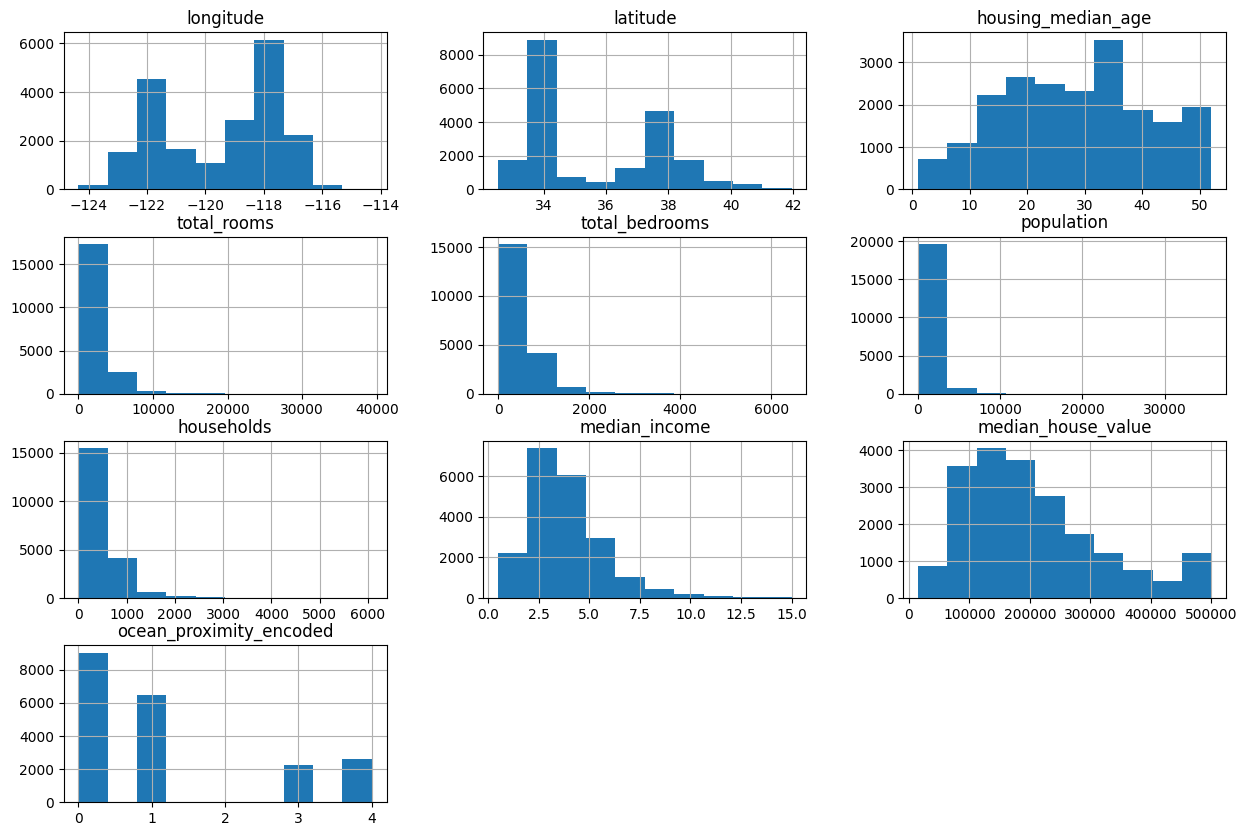

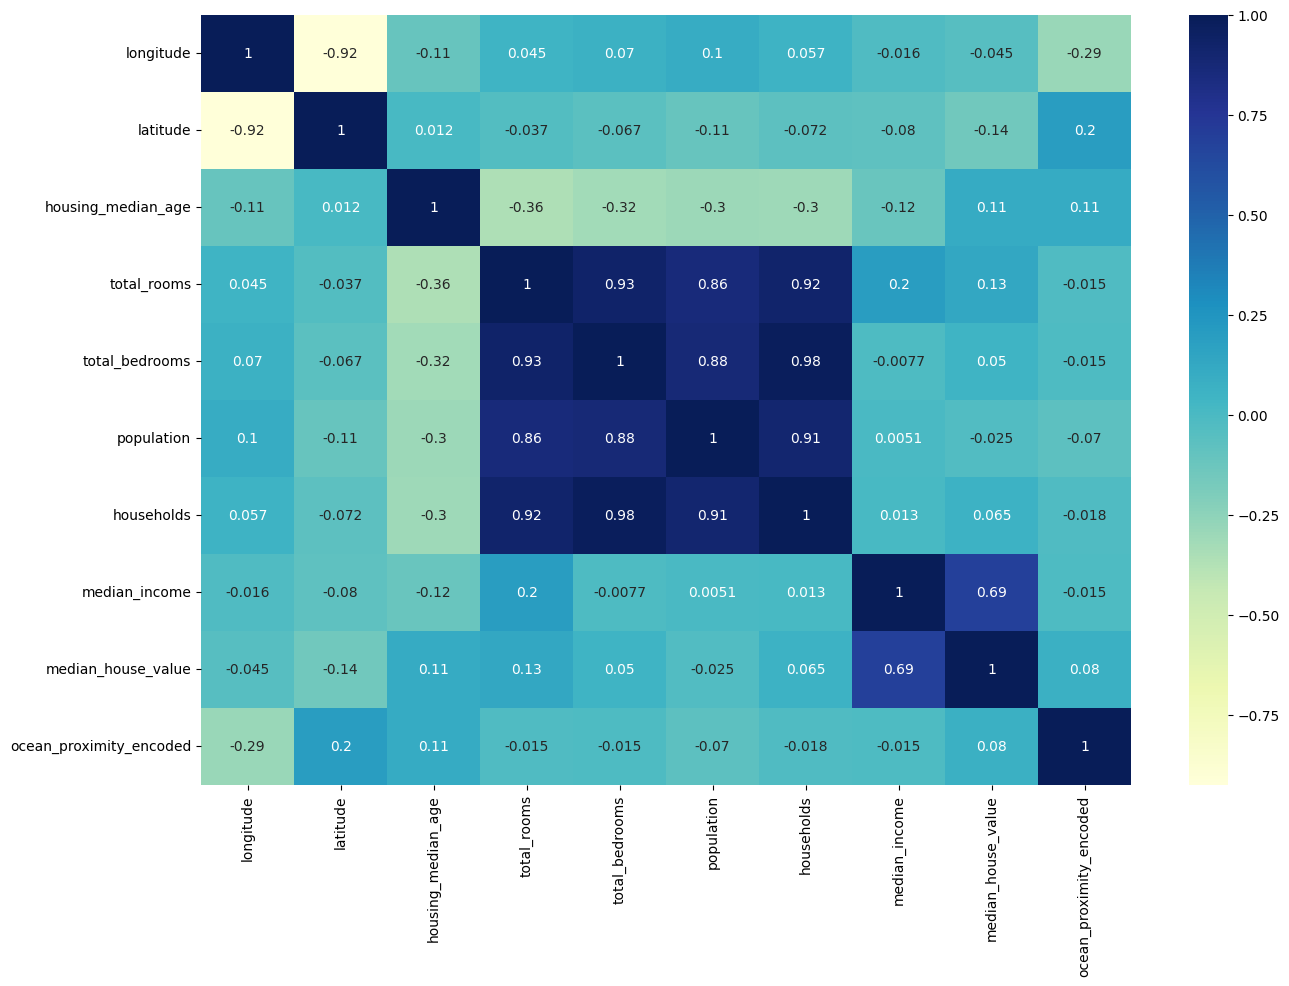

In [ ]:
# correlating the X and y data
# train_data = X_train.join(y_train) # Add suffixes to distinguish overlapping columns
# print(train_data)


train_data = X.copy()
train_data['median_house_value'] = y

# visualizing by histogram
train_data.hist(figsize=(15,10))

# Convert 'ocean_proximity' to numerical data using one-hot encoding i.e., True or False
# train_data = pd.get_dummies(train_data, columns=['ocean_proximity'])
label_encoder = LabelEncoder()

data['ocean_proximity_encoded'] = label_encoder.fit_transform(data['ocean_proximity'])

X = data.drop(['ocean_proximity'], axis=1)

print(X)

# Calculate the correlation matrix correlating values within column
# train_data.corr()


# THIS CORRELATED DATA HELPS THE BEST TO CHOOSE THE FACTORS TO WORK UPON
# visulaizing by heatmap
# annotaion = True to see the actual correlation numbers ; colormap =  yellowgreenblue
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')
plt.show()

DATA PREPROCESSING :-

In [ ]:
# we are doing this for the graphs which are seen as skewed(unsymmetric on left and right sides of median)
# +1 is done to avoid issues when taking logarithm of values closer to 0
# np.log is taken so that now date is more normally distributed to avoid impact of outliers
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)
# skewness will be gone now

In [ ]:
# train_data.hist(figsize=(15,8))

# # Access one of the new one-hot encoded columns
# # Example: if one of the new columns is 'ocean_proximity_<1H OCEAN'
# print(train_data['ocean_proximity_<1H OCEAN'].value_counts())
# print(train_data['ocean_proximity_INLAND'].value_counts())
# print(train_data['ocean_proximity_NEAR OCEAN'].value_counts())
# print(train_data['ocean_proximity_NEAR BAY'].value_counts())
# print(train_data['ocean_proximity_ISLAND'].value_counts())
# # pd.get_dummies:- converts categorical variables into one-hot encoded binary columns; & it is already done in above lines in behined



# --------label encoder proved better than pd.get_dummies-------------

In [ ]:
train_data
# here we can confirm that role of [pd.get_dummies(not used)] label_encoder(used) was practised in above box while value_counts()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_encoded
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,3
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,3
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,3
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,3
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,1
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,1
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,1
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,1


<Axes: >

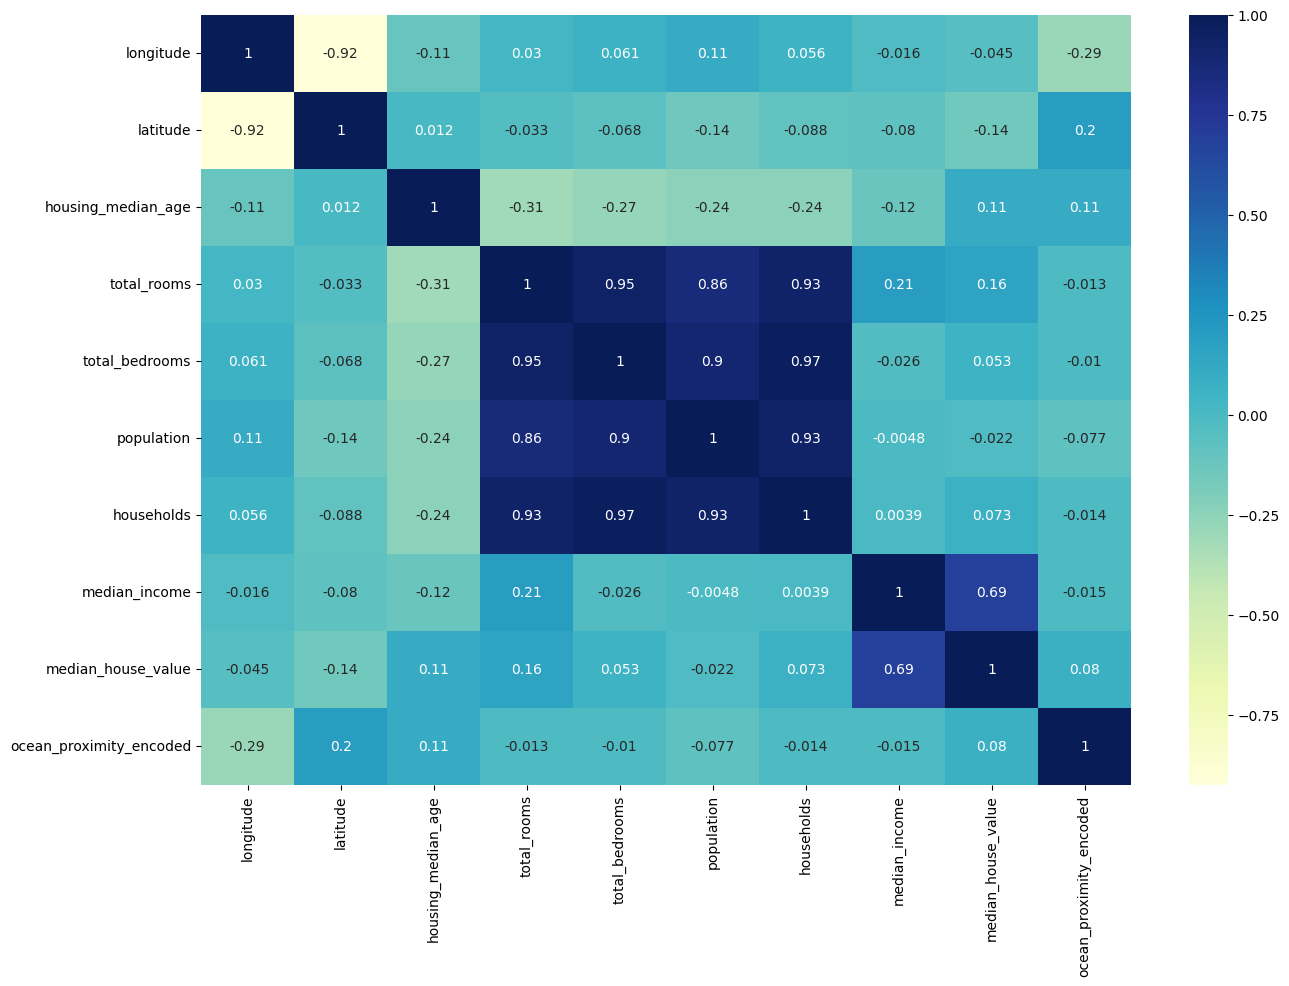

In [ ]:
# now lets check how the score relates to each of the subbranch of ocean_proximity
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')
# the heatmap thus created shows that -ve values relation directs to the less price for median house value and +ve values directs to higher price

<Axes: xlabel='longitude', ylabel='latitude'>

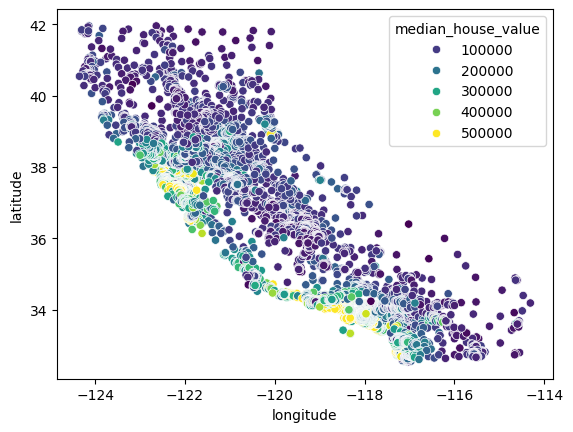

In [ ]:
# this step is just to get the insight lower lattitude and longitude directs to near ocean so if we are towards ocean then prices are predicted high
sns.scatterplot(data=train_data,x='longitude',y='latitude',hue='median_house_value',palette='viridis')


FEATURE ENGINEERING :-

This step involves finding different featues and how they can be used to identify any specific property which can be helpful for applying ml for prediction.
This is just to keep exploring knowledge, finding/researching factors that can help kind of step

In [ ]:
# no. of bedrooms per no. of rooms can be useful feature
train_data['bedroom_per_room'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_encoded,bedroom_per_room
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,3,0.717813
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,3,0.790429
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,3,0.720313
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,3,0.764097
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,3,0.762444
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,1,0.798973
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,1,0.766205
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,1,0.801228
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,1,0.799078


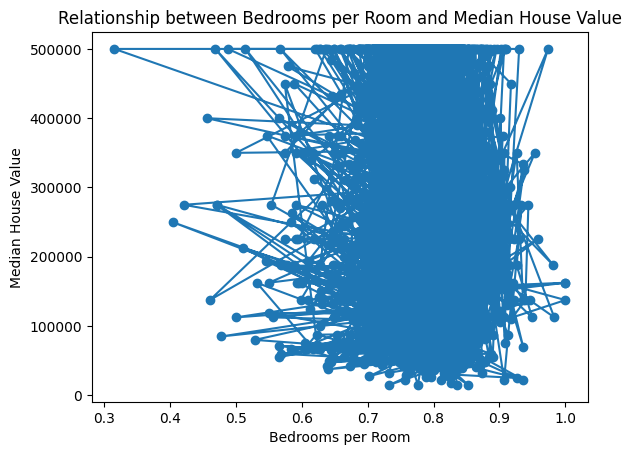

In [ ]:

plt.plot(train_data['bedroom_per_room'],train_data['median_house_value'],marker='o')
plt.xlabel('Bedrooms per Room')
plt.ylabel('Median House Value')
plt.title('Relationship between Bedrooms per Room and Median House Value')
plt.show()
# this graph shows that almost for all median_house_value's bedroom_per_room is between 0.7 to 0.8 almost everytime

<Axes: >

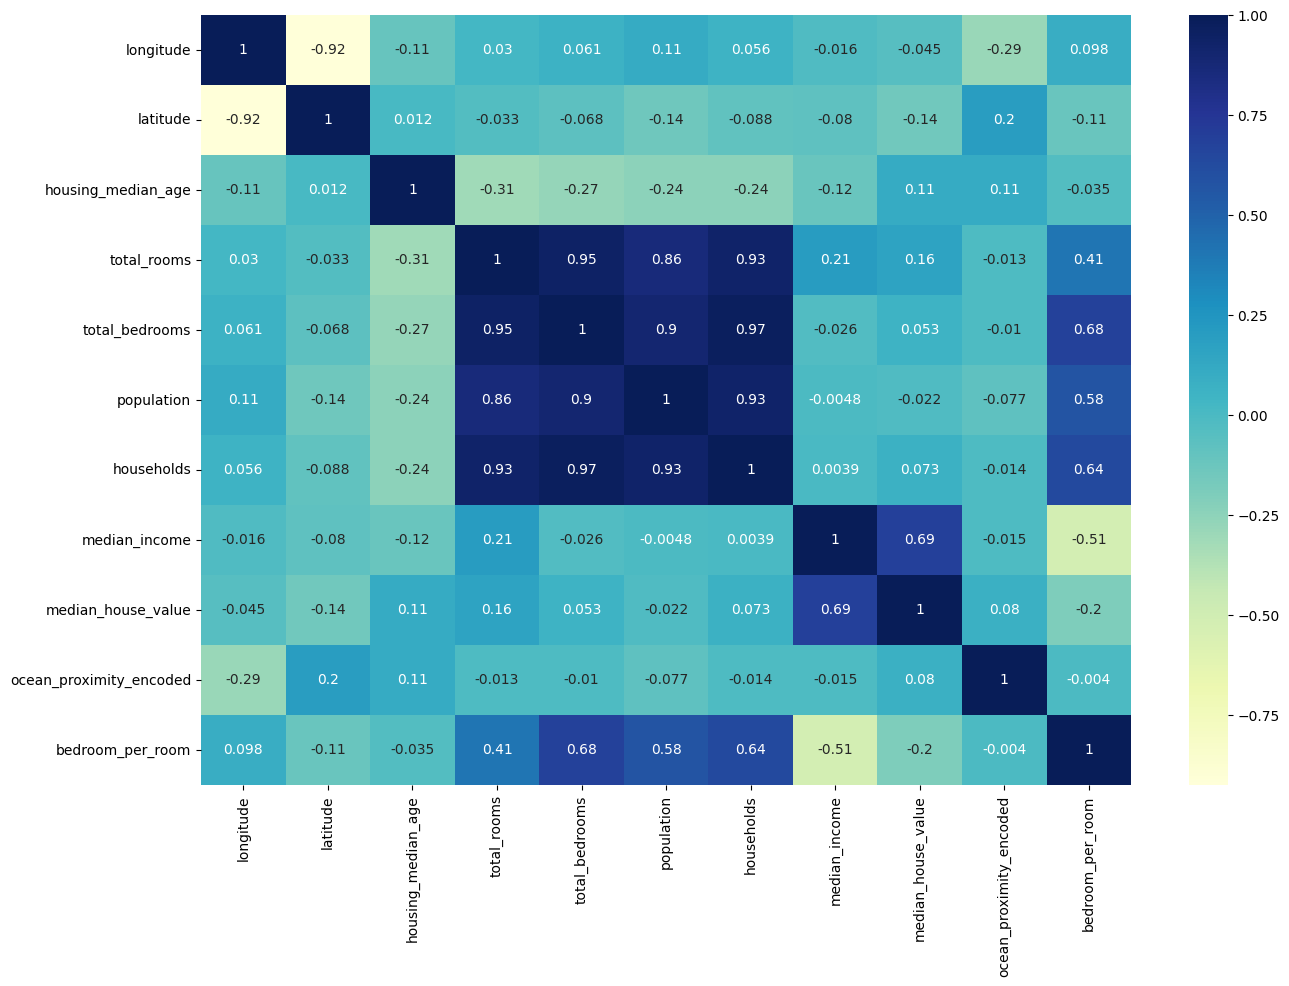

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')
# so this feature was not feasible for the research as relation has -ve value
# which confirms the observation in precious code block

Do regression and not classification because of continuous values

Linear Regression:-

by using MinMaxScaler

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    train_data.drop(['median_house_value'], axis=1),
    train_data['median_house_value'],
    test_size=0.2,
    random_state=42
)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test data
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(scaled_X_train, y_train)

# Evaluate the model on the scaled test data
train_score = model.score(scaled_X_train, y_train)
test_score = model.score(scaled_X_test, y_test)

print(f"Training Score: {train_score}")
print(f"Test Score: {test_score}")


Training Score: 0.6654458830589657
Test Score: 0.6633157663844678


by using StandardScaler

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data into training and testing sets
X = train_data.drop(['median_house_value'], axis=1)
y = train_data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
scaled_X_train = scaler.fit_transform(X_train)

# Scale the test data using the same scaler
scaled_X_test = scaler.transform(X_test)

# Initialize the model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(scaled_X_train, y_train)

# Evaluate the model on the scaled test data
score = model.score(scaled_X_test, y_test)
print(f"Model Score: {score}")


Model Score: 0.6633157663844678


below code is not useful now as using label_encoder in place of pd.get_dummies

In [ ]:

# test_data = X_test.join(y_test)

# # Apply log transformation to relevant columns
# for col in ['total_rooms', 'total_bedrooms', 'population', 'households']:
#     test_data[col] = np.log1p(test_data[col])

# # Check if 'ocean_proximity' exists and perform one-hot encoding
# if 'ocean_proximity' in test_data.columns:
#     test_data = pd.get_dummies(test_data, columns=['ocean_proximity'], drop_first=True)
# else:
#     print("Warning: 'ocean_proximity' column not found in test_data.")


# test_data['bedroom_per_room'] = test_data['total_bedrooms'] / test_data['total_rooms']

# # Separate the features and target variable
# X_test = test_data.drop('median_house_value', axis=1)
# y_test = test_data['median_house_value']

# score = model.score(X_test, y_test)
# print(f"Model Score: {score}")

Random Forest Regressor:-

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(scaled_X_train, y_train)
forest_score = forest.score(scaled_X_test, y_test)
print(f"Model Score: {forest_score}")

Model Score: 0.8169850534542374


In [ ]:
from sklearn.model_selection import GridSearchCV

# parameter_grid will cross validate all the features
parameter_grid = {
    "n_estimators" : [3,50,100],
    "max_features" : [2,4,6,8],
    "min_samples_split" : [2,4,6]
}
# cv = cross-validation i.e., making several combinations out of the hyperparameters in the parameter_grid
grid_search = GridSearchCV(forest,parameter_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [3, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# grid_search.best_params_
grid_search.best_estimator_
grid_search.best_estimator.score(scaled_X_test,y_test)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator'